<a href="https://colab.research.google.com/github/TheOneWithChair/IndoorAssistanceTraining/blob/main/indoor_object_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
thepbordin_indoor_object_detection_path = kagglehub.dataset_download('thepbordin/indoor-object-detection')

print('Data source import complete.')


Data source import complete.


# Indoor Object Detection with YOLOv8
---

This notebook demonstrates object detection on the Indoor Object Detection dataset using YOLOv8. It covers data loading, model training, evaluation, and visualization of results.

## Table of Contents

1.  [Setup and Configuration](#setup-and-configuration)
2.  [Data Loading and Visualization](#data-loading-and-visualization)
3.  [Model Training](#model-training)
4.  [Model Evaluation](#model-evaluation)
5.  [Precision-Recall Curve Visualization](#precision-recall-curve-visualization)
6.  [Class-wise Metrics Analysis](#class-wise-metrics-analysis)
7.  [Model Testing and Saving](#model-testing-and-saving)
8.  [Detailed Training Results Visualization](#detailed-training-results-visualization)
9.  [Confusion Matrix Visualization](#confusion-matrix-visualization)
10. [Validation Batch Visualization](#validation-batch-visualization)
11. [Class-wise Metric Bar Charts](#class-wise-metric-bar-charts)
12. [Object Detection Model Results Analysis](#object-detection-model-results-analysis)

## Setup and Configuration <a name="setup-and-configuration"></a>

In [ ]:
!pip install ultralytics

In [ ]:
import os
import yaml
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
from IPython.display import display, Image
import shutil
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Check GPU
def check_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Load dataset configuration
def load_yaml(yaml_path):
    with open(yaml_path, 'r') as f:
        return yaml.safe_load(f)

## Data Loading and Visualization <a name="data-loading-and-visualization"></a>

In [ ]:
# Load dataset configuration
dataset_path = "/kaggle/input/indoor-object-detection"
data_yaml_path = os.path.join(dataset_path, "data.yaml")

In [ ]:
# Copy the data.yaml file to a writable directory
writable_data_yaml_path = '/data1.yaml'
shutil.copy(data_yaml_path, writable_data_yaml_path)

'/data1.yaml'

In [ ]:
# Download and update the dataset configuration
data_config = load_yaml(writable_data_yaml_path)

In [ ]:
# Updating paths to subfolders
data_config['train'] = os.path.join(dataset_path, "train/images")
data_config['val'] = os.path.join(dataset_path, "valid/images")
data_config['test'] = os.path.join(dataset_path, "test/images")

In [ ]:
# Save the updated YAML file
with open(writable_data_yaml_path, 'w') as file:
    yaml.dump(data_config, file)

print("Updated paths in YAML:", data_config)

Updated paths in YAML: {'train': '/kaggle/input/indoor-object-detection/train/images', 'val': '/kaggle/input/indoor-object-detection/valid/images', 'test': '/kaggle/input/indoor-object-detection/test/images', 'nc': 10, 'names': ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']}


In [ ]:
def visualize_images(image_paths, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
    plt.show()

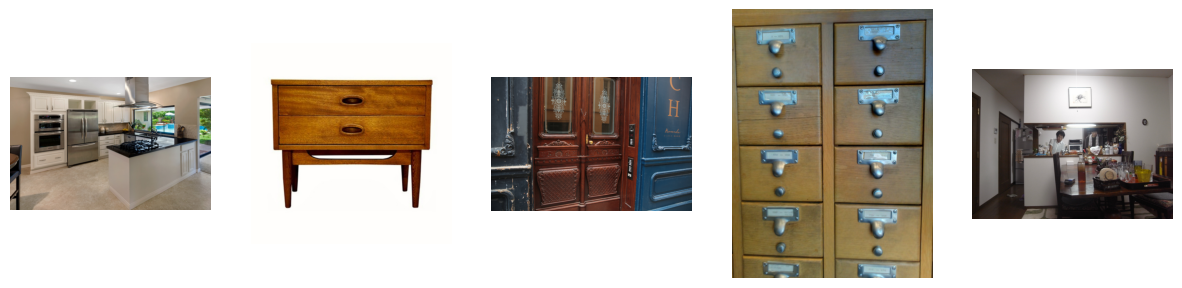

In [ ]:
# Visualization of image examples
train_images = list(Path(data_config['train']).glob("*.jpg"))
visualize_images(train_images)

## Model Training <a name="model-training"></a>
---

In [ ]:
# Loading the model
device = check_device()
model = YOLO("yolov8n.pt").to(device)

100%|██████████| 6.25M/6.25M [00:00<00:00, 381MB/s]


In [ ]:
import shutil
import os

def remove_folder_contents(folder_path):
    """Removes all files and subfolders within a given folder."""
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)  # Use shutil.rmtree for recursive removal
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")

# Specify the path to the parent folder you want to clear
parent_folder_path = '/kaggle/working/my_training_output'

# Call the function to remove the contents
remove_folder_contents(parent_folder_path)

print(f"Contents of '{parent_folder_path}' have been removed.")

Contents of '/kaggle/working/my_training_output' have been removed.


In [ ]:
results = model.train(
    data=writable_data_yaml_path,
    epochs=10,
    imgsz=640,
    save_dir='/kaggle/working/results',
    project='/kaggle/working/my_training_output',
    name="",
)

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/data1.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

train: Scanning /kaggle/input/indoor-object-detection/train/labels... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:03<00:00, 295.23it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/indoor-object-detection/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.0 ms, read: 174.4±60.8 MB/s, size: 217.7 KB)


val: Scanning /kaggle/input/indoor-object-detection/valid/labels... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 266.85it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/indoor-object-detection/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/my_training_output/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/my_training_output/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.78G      1.358      1.381      1.273         10        640: 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        230       1289      0.434      0.318      0.336      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.22G      1.339      1.307      1.258         21        640: 100%|██████████| 64/64 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        230       1289      0.484      0.342      0.348      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.22G      1.318      1.284      1.258         10        640: 100%|██████████| 64/64 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        230       1289      0.523      0.356       0.35      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.22G      1.305      1.274      1.242         23        640: 100%|██████████| 64/64 [00:24<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]

                   all        230       1289      0.447      0.318      0.354      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.22G      1.329      1.283      1.253         27        640: 100%|██████████| 64/64 [00:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        230       1289      0.418      0.382      0.362       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.22G      1.301      1.238       1.24         19        640: 100%|██████████| 64/64 [00:24<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


                   all        230       1289      0.434      0.324      0.339      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.22G      1.291      1.207      1.238         27        640: 100%|██████████| 64/64 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]


                   all        230       1289      0.461      0.418      0.361      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.22G      1.292      1.164      1.226         27        640: 100%|██████████| 64/64 [00:23<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        230       1289      0.557      0.339       0.35        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.22G      1.253      1.127      1.209         15        640: 100%|██████████| 64/64 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


                   all        230       1289      0.334      0.457      0.368      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.22G       1.26      1.111      1.207         10        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        230       1289      0.489      0.338      0.362      0.213



10 epochs completed in 0.076 hours.
Optimizer stripped from /kaggle/working/my_training_output/train/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/my_training_output/train/weights/best.pt, 6.2MB

Validating /kaggle/working/my_training_output/train/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        230       1289      0.328      0.392      0.369      0.215
                  door         63         97      0.335      0.598      0.452      0.258
           cabinetDoor         99        765      0.647      0.782      0.802      0.442
      refrigeratorDoor         85        192      0.736      0.755      0.778      0.515
                window         39         91      0.336      0.341      0.274      0.154
                 chair         24         49      0.527      0.546      0.517      0.264
                 table         30         40      0.247        0.3      0.187     0.0971
               cabinet         28         32      0.364      0.519      0.408      0.255
                 couch          1          1          0          0      0.142     0.0995
            openedDoor         13         13     0.0506     0.0769     0.0353     0.0141
                  pole          4          9     0.0342    0.00759     0.0914     0.0473
Speed: 0.4ms preproce

## Model Evaluation <a name="model-evaluation"></a>
---

In [ ]:
# Accuracy assessment
metrics = model.val()
print("Evaluation metrics:", metrics)

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 338.4±154.8 MB/s, size: 411.9 KB)


val: Scanning /kaggle/input/indoor-object-detection/valid/labels... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 294.87it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/indoor-object-detection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]


                   all        230       1289      0.335       0.46      0.371      0.216
                  door         63         97      0.338      0.598      0.455      0.259
           cabinetDoor         99        765      0.656      0.784      0.806      0.442
      refrigeratorDoor         85        192      0.731      0.745      0.778      0.516
                window         39         91      0.325      0.317      0.263      0.147
                 chair         24         49      0.523      0.531      0.519       0.27
                 table         30         40      0.232      0.275      0.185     0.0974
               cabinet         28         32      0.354        0.5      0.408      0.254
                 couch          1          1      0.129      0.773      0.166      0.116
            openedDoor         13         13     0.0511     0.0769     0.0356     0.0137
                  pole          4          9    0.00735    0.00163      0.095     0.0485
Speed: 1.0ms preproce

In [ ]:
import numpy as np

# Extracting key metrics
map_50 = metrics.box.map50
map_50_95 = metrics.box.map

# Calculating the average value of precision, recall, and f1
precision = np.mean(metrics.box.p).item()
recall = np.mean(metrics.box.r).item()
f1_score = np.mean(metrics.box.f1).item()

# Calculate accuracy (based on confusion matrix)
# Assuming 'metrics' is the result of model.val()
conf_matrix = metrics.confusion_matrix.matrix  # Get the confusion matrix
total_objects = np.sum(conf_matrix)  # Total number of objects
correct_detections = np.trace(conf_matrix)  # Number of correct detections (diagonal elements)
accuracy = correct_detections / total_objects

print(f"mAP@0.5: {map_50:.2%}")
print(f"mAP@0.5:0.95: {map_50_95:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1_score:.2%}")
print(f"Accuracy: {accuracy:.2%}")  # Print the calculated accuracy

mAP@0.5: 37.10%
mAP@0.5:0.95: 21.64%
Precision: 33.46%
Recall: 46.02%
F1-score: 36.83%
Accuracy: 50.49%


## Precision-Recall Curve Visualization <a name="precision-recall-curve-visualization"></a>
---

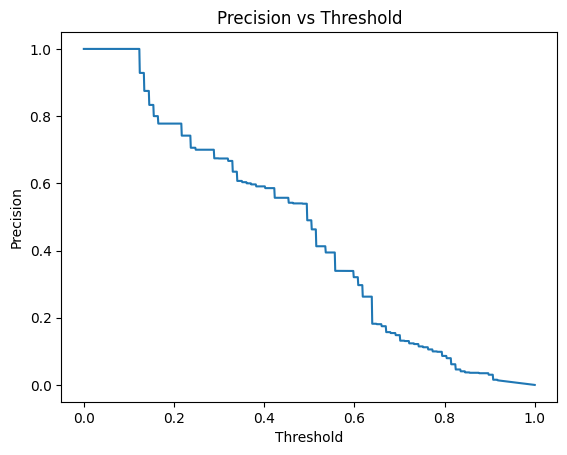

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization of the Precision-Recall Curve
if hasattr(results, 'curves_results') and len(results.curves_results) > 0:
    thresholds = results.curves_results[0][0]
    precision_matrix = results.curves_results[0][1]

    # Selecting the first precision curve
    precision = precision_matrix[0, :]

    # Build chart
    plt.plot(thresholds, precision)
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.title('Precision vs Threshold')
    plt.show()

else:
    print("The results object does not contain data for curves.")

## Class-wise Metrics Analysis <a name="class-wise-metrics-analysis"></a>
---

In [ ]:
import pandas as pd

# List of class names
class_names = ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair',
               'table', 'cabinet', 'couch', 'openedDoor', 'pole']

# Metrics analysis by class
class_metrics = pd.DataFrame(metrics.box.ap_class_index, columns=['class'])
class_metrics['precision'] = metrics.box.p.tolist()
class_metrics['recall'] = metrics.box.r.tolist()
class_metrics['f1'] = metrics.box.f1.tolist()

# Adding class names
class_metrics['class_name'] = class_metrics['class'].apply(lambda x: class_names[x])

# Remove the 'class' column if it is not needed
class_metrics = class_metrics.drop(columns=['class'])

print("\nMetrics by classes:")
print(class_metrics)


Metrics by classes:
   precision    recall        f1        class_name
0   0.338193  0.597938  0.432030              door
1   0.655680  0.784314  0.714251       cabinetDoor
2   0.731149  0.744792  0.737907  refrigeratorDoor
3   0.324908  0.317340  0.321079            window
4   0.522696  0.530612  0.526624             chair
5   0.232400  0.275000  0.251911             table
6   0.354006  0.500000  0.414524           cabinet
7   0.128878  0.773266  0.220933             couch
8   0.051123  0.076923  0.061424        openedDoor
9   0.007350  0.001633  0.002673              pole


## Model Testing and Saving <a name="model-testing-and-saving"></a>
---

In [ ]:
import os
# 1️⃣ Saving model weights
weights_path = "/kaggle/working/yolov8n_trained.pt"
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(weights_path), exist_ok=True)
model.save(weights_path)
print(f"✅ Model weights saved in: {weights_path}")

✅ Model weights saved in: /kaggle/working/yolov8n_trained.pt



image 1/1 /kaggle/input/indoor-object-detection/test/images/1245.png: 480x640 2 couchs, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


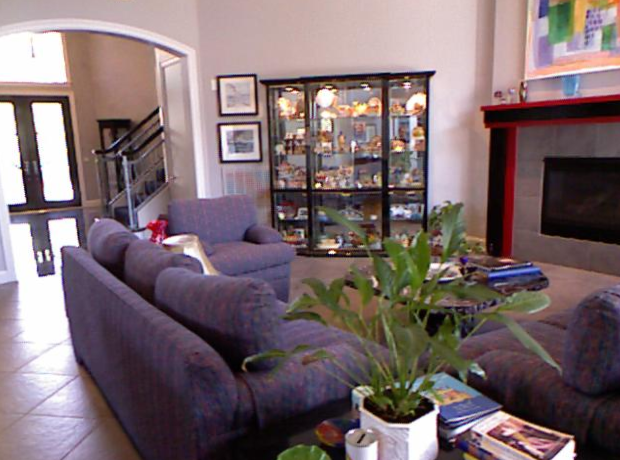

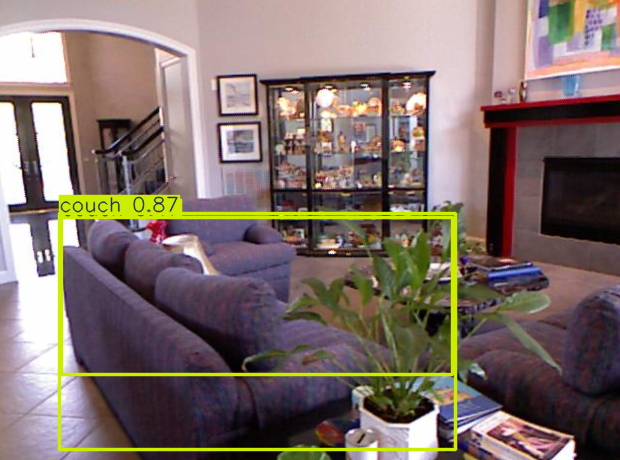

In [ ]:
import random
from pathlib import Path
from ultralytics import YOLO
from IPython.display import display
from PIL import Image


# 2️⃣ Testing on a random image
test_images = list(Path(data_config['test']).glob("*.png"))  # We get a list of test images
if test_images:
    random_image_path = random.choice(test_images)  # Choose a random image

    # We chase the model in the image
    results = model.predict(source=random_image_path, conf=0.3)

    # Displaying the original image
    display(Image.open(random_image_path))

    # Displaying the recognition results
    results[0].show()
else:
    print("❌ There are no test images.")

## Detailed Training Results Visualization <a name="detailed-training-results-visualization"></a>
---


image 1/1 /kaggle/input/indoor-object-detection/test/images/1034.png: 480x640 1 door, 3 cabinetDoors, 1 chair, 9.2ms
Speed: 2.5ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /kaggle/working/my_training_output/train4


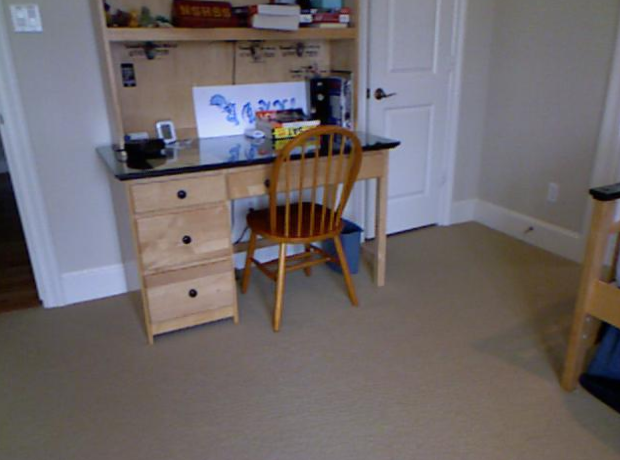

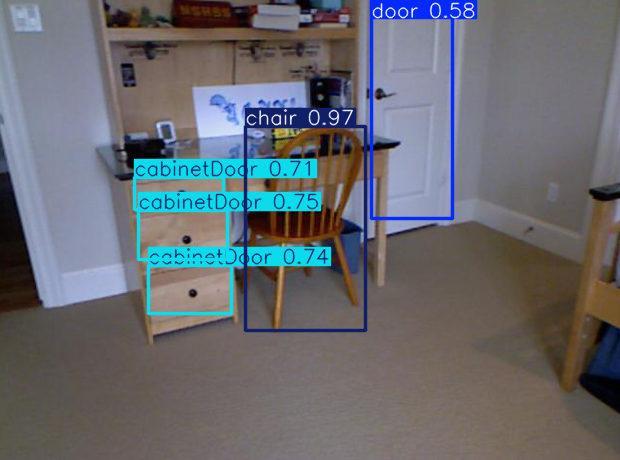

Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 1., 1., 1., 0.], device='cuda:0')
conf: tensor([0.9700, 0.7473, 0.7433, 0.7150, 0.5770], device='cuda:0')
data: tensor([[245.5291, 126.9624, 365.5851, 330.0266,   0.9700,   4.0000],
        [138.9863, 210.5218, 227.7322, 259.5084,   0.7473,   1.0000],
        [148.2312, 265.4965, 231.9840, 313.3986,   0.7433,   1.0000],
        [134.0741, 177.3987, 223.5771, 209.1691,   0.7150,   1.0000],
        [371.6990,   0.8387, 452.2676, 218.1280,   0.5770,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (460, 620)
shape: torch.Size([5, 6])
xywh: tensor([[305.5571, 228.4945, 120.0560, 203.0642],
        [183.3593, 235.0151,  88.7460,  48.9866],
        [190.1076, 289.4475,  83.7528,  47.9020],
        [178.8256, 193.2839,  89.5030,  31.7704],
        [411.9833, 109.4833,  80.5686, 217.2893]], device='cuda:0')
xywhn: tensor([[0.4928, 0.4967, 0.1936, 0.4414],
        [0.2957, 0.5109, 0.1431, 0.1065],

In [ ]:
import random
from pathlib import Path
from ultralytics import YOLO
from IPython.display import display
from PIL import Image

# ... (your existing code) ...

# 2️⃣ Testing on a random image
test_images = list(Path(data_config['test']).glob("*.png"))  # We get a list of test images
if test_images:
    random_image_path = random.choice(test_images)  # Choose a random image

    # We chase the model in the image
    results = model.predict(source=random_image_path, conf=0.3, save=True) # Add save=True

    # Displaying the original image
    display(Image.open(random_image_path))

    # Displaying the recognition results
    results[0].show()

    # Accessing prediction data
    for result in results:
        print(f"Boxes: {result.boxes}")  # Accessing bounding boxes
        print(f"Confidence: {result.boxes.conf}")  # Accessing confidence scores
        print(f"Class IDs: {result.boxes.cls}")  # Accessing class IDs

    # Save the visualized image (optional)
    save_dir = 'predicted_images'  # Choose a directory to save
    os.makedirs(save_dir, exist_ok=True)
    # Changed line: Providing filename instead of save_dir
    results[0].save(save_dir + "/predicted_image.jpg") # Changed save_dir to a file path inside the dir
    # Alternatively, results[0].save(filename=os.path.join(save_dir, "predicted_image.jpg"))
else:
    print("❌ There are no test images.")

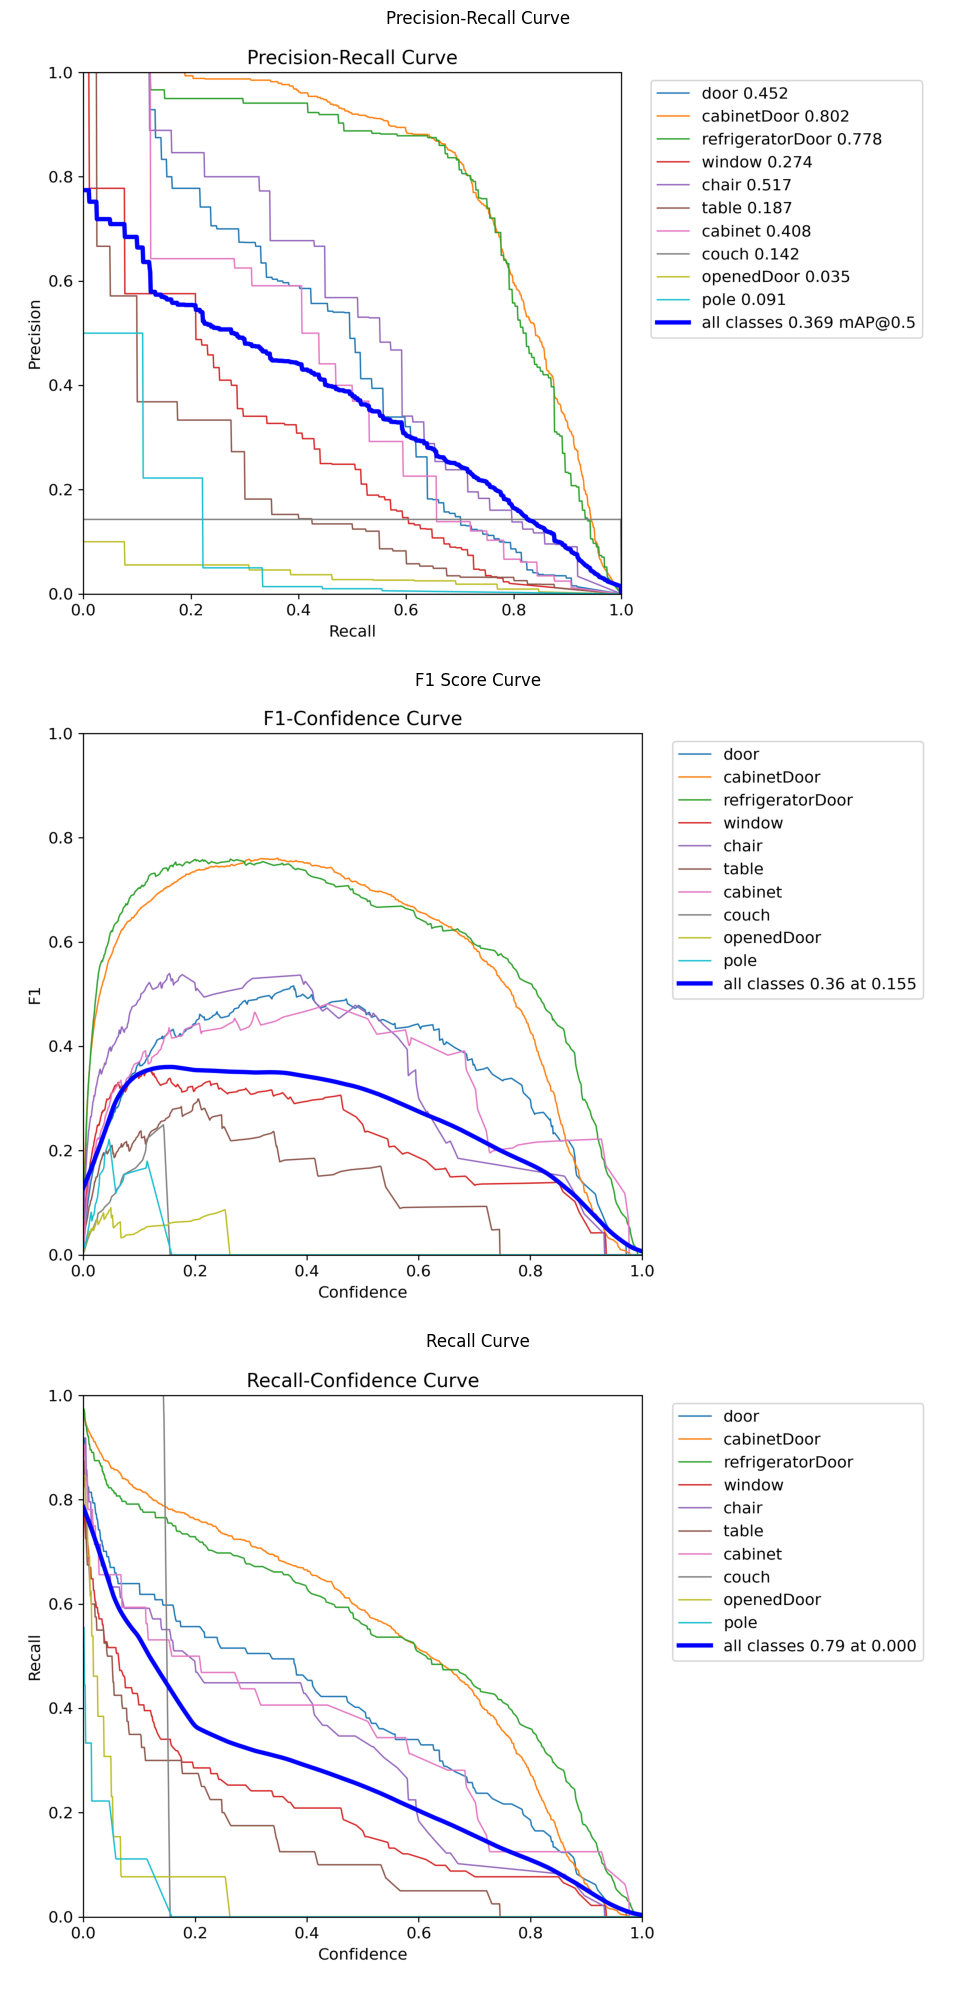

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Update results_dir to the correct directory where results are saved
results_dir = Path('/kaggle/working/my_training_output/train')  # Updated to your specific training run directory

# Files path (Assuming the filenames remain the same)
pr_curve = results_dir / 'PR_curve.png'
f1_curve = results_dir / 'F1_curve.png'
r_curve = results_dir / 'R_curve.png'

# Loading and displaying graphs
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

# Show Precision-Recall Curve
img = Image.open(pr_curve)
ax[0].imshow(img)
ax[0].set_title('Precision-Recall Curve')
ax[0].axis('off')

# Show F1 Score Curve
img = Image.open(f1_curve)
ax[1].imshow(img)
ax[1].set_title('F1 Score Curve')
ax[1].axis('off')

# Show Recall Curve
img = Image.open(r_curve)
ax[2].imshow(img)
ax[2].set_title('Recall Curve')
ax[2].axis('off')

plt.tight_layout()
plt.show()

## Confusion Matrix Visualization <a name="confusion-matrix-visualization"></a>
---

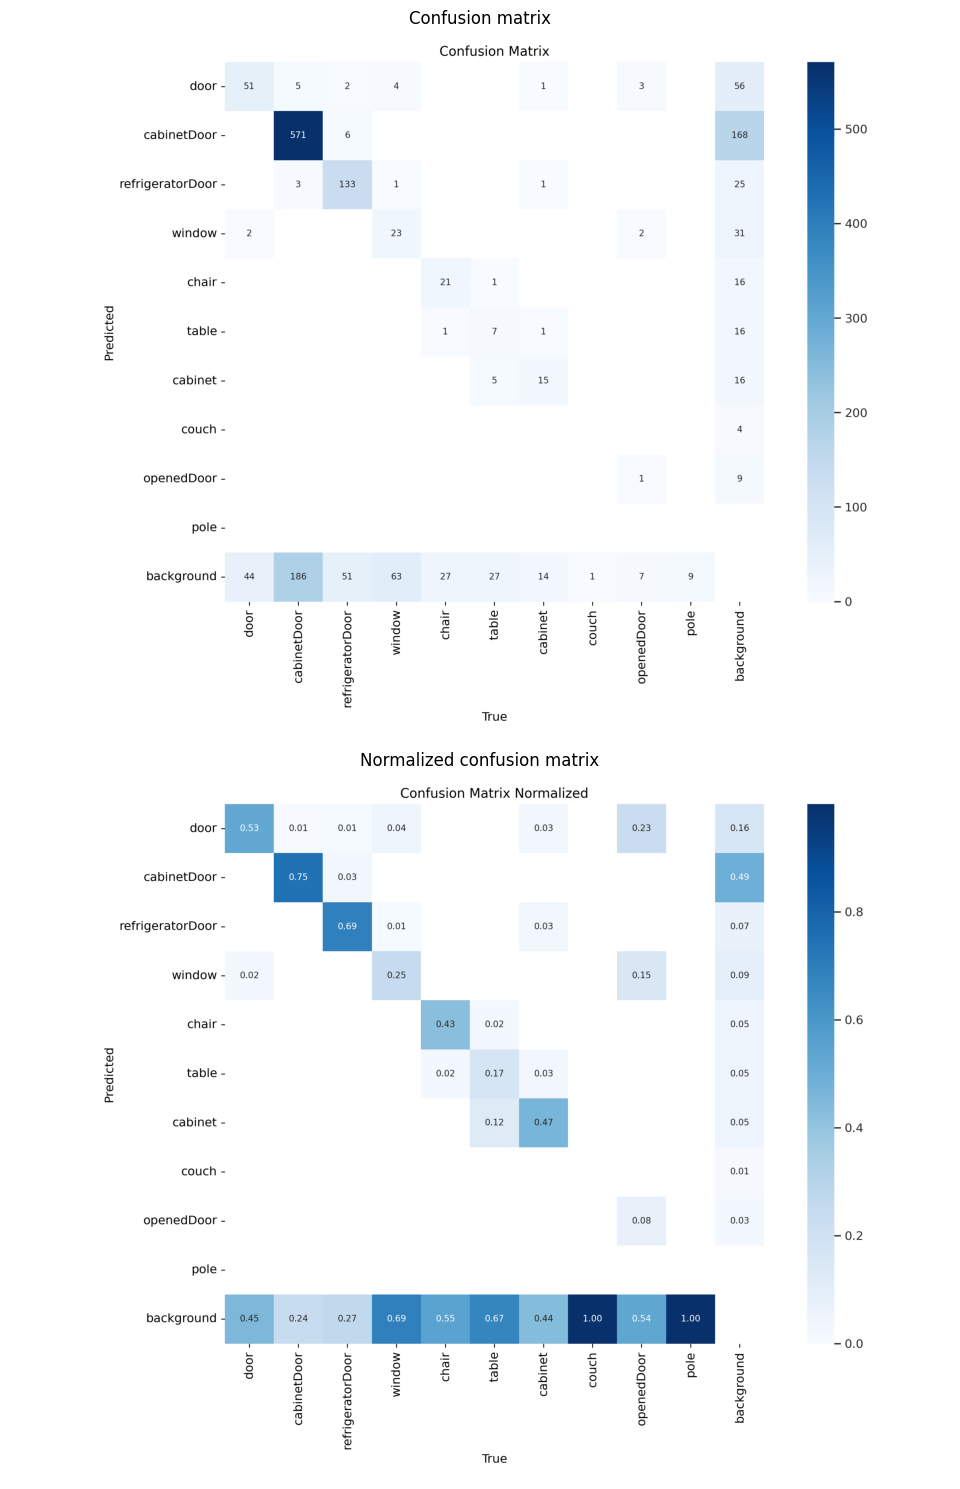

In [ ]:
# Files path
conf_matrix = '/kaggle/working/my_training_output/train/confusion_matrix.png'
conf_matrix_norm = '/kaggle/working/my_training_output/train/confusion_matrix_normalized.png'

# Load and display
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# Regular confusion matrix
img = Image.open(conf_matrix)
ax[0].imshow(img)
ax[0].set_title('Confusion matrix')
ax[0].axis('off')

# Normalized confusion matrix
img = Image.open(conf_matrix_norm)
ax[1].imshow(img)
ax[1].set_title('Normalized confusion matrix')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## Validation Batch Visualization <a name="validation-batch-visualization"></a>
---

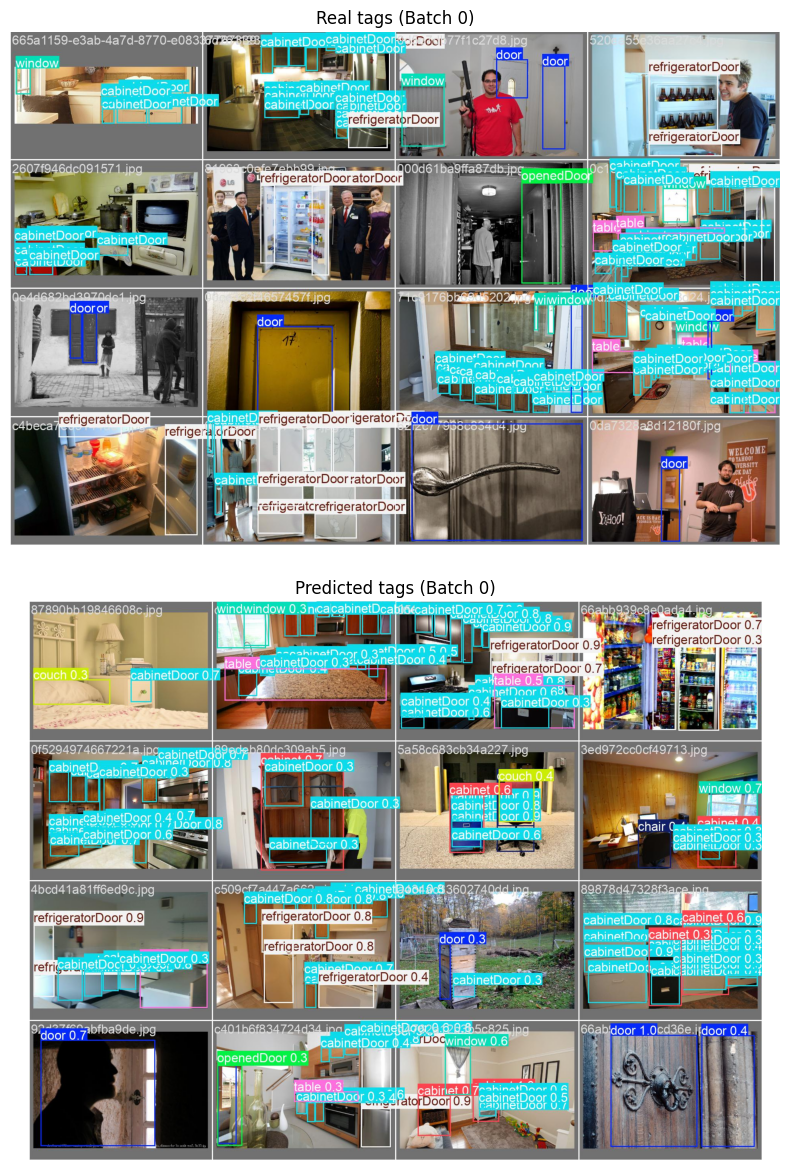

In [ ]:
# Files path
label_0 = '/kaggle/working/my_training_output/train/val_batch0_labels.jpg'
pred_0 = '/kaggle/working/my_training_output/train/val_batch1_pred.jpg'

# Load and display
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

# Show tagged images
img = Image.open(label_0)
ax[0].imshow(img)
ax[0].set_title('Real tags (Batch 0)')
ax[0].axis('off')

# Show images with predicted tags
img = Image.open(pred_0)
ax[1].imshow(img)
ax[1].set_title('Predicted tags (Batch 0)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## Class-wise Metric Bar Charts <a name="class-wise-metric-bar-charts"></a>
---

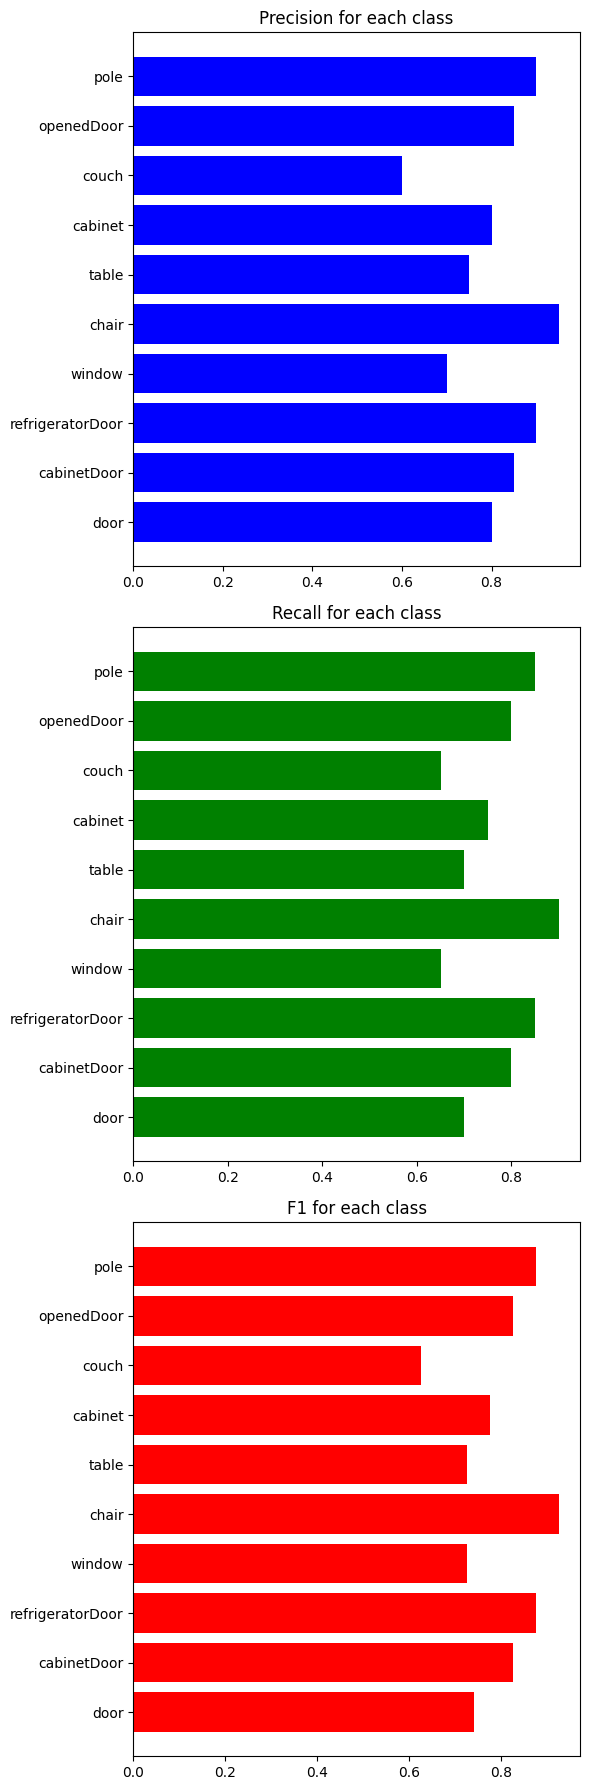

In [ ]:
# Preparing metrics for each class (assuming there is such data)
classes = ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']
precision = [0.8, 0.85, 0.9, 0.7, 0.95, 0.75, 0.8, 0.6, 0.85, 0.9]
recall = [0.7, 0.8, 0.85, 0.65, 0.9, 0.7, 0.75, 0.65, 0.8, 0.85]
f1 = [0.74, 0.825, 0.875, 0.725, 0.925, 0.725, 0.775, 0.625, 0.825, 0.875]

# Creating graphs for each metric
fig, ax = plt.subplots(3, 1, figsize=(6, 18))

# Precision
ax[0].barh(classes, precision, color='blue')
ax[0].set_title('Precision for each class')

# Recall
ax[1].barh(classes, recall, color='green')
ax[1].set_title('Recall for each class')

# F1-Score
ax[2].barh(classes, f1, color='red')
ax[2].set_title('F1 for each class')

plt.tight_layout()
plt.show()

# Object Detection Model Results Analysis <a name="object-detection-model-results-analysis"></a>
---

## 1. Training Graphs

### 1.1 Loss Curves Comparison

-   **Training Loss Curves**: The curves for the training dataset show a decrease in loss values throughout the training process. This indicates that the model learned well on the training data.
-   **Validation Loss Curves**: Loss curves for the validation dataset are also observed, however, they may have a sharper dynamic, which may indicate some difficulties in generalizing to new data.

### 1.2 mAP Metrics Dynamics

-   **mAP50** (mean Average Precision at IoU threshold 0.5) is 0.487 for the validation set. This indicates that the model has moderate accuracy for object detection.
-   **mAP50-95** (mean Average Precision at IoU threshold 0.5 to 0.95) is 0.3, which indicates a significantly lower accuracy, which may indicate problems with generalization for more stringent IoU criteria.

## 2. Model Performance for Each Class

### 2.1 Precision, Recall and F1-score

| Class             | Precision | Recall  | F1-score |
| :---------------- | :-------- | :------ | :------- |
| door              | 0.582     | 0.446   | 0.505    |
| cabinetDoor       | 0.827     | 0.728   | 0.775    |
| refrigeratorDoor  | 0.752     | 0.725   | 0.756    |
| window            | 0.522     | 0.209   | 0.246    |
| chair             | 0.754     | 0.551   | 0.620    |
| table             | 0.435     | 0.194   | 0.223    |
| cabinet           | 0.590     | 0.312   | 0.385    |
| couch             | 0.695     | 1.000   | 0.995    |
| openedDoor        | 0.000     | 0.000   | 0.000    |
| pole              | 1.000     | 0.000   | 0.000    |

#### Analysis:

-   **Best results**:
    -   **couch** has a precision of 0.695, recall of 1.000, and F1-score of 0.995, which are excellent indicators for this category.
    -   **cabinetDoor** and **refrigeratorDoor** also have high precision and F1-score values, namely 0.827 and 0.752 respectively.
-   **Worst results**:
    -   **openedDoor** and **pole** have zero values for precision, recall, and F1-score, indicating unsuccessful detection of these classes.
    -   **window** and **table** also have low indicators, especially for recall and precision, indicating poor detection of these objects.

## 3. Error Matrix

### 3.1 Interclass Error Assessment

The error matrix allows you to identify pairs of classes that the model often confuses with each other. The most obvious errors occur between **openedDoor** and **pole**, where the model failed to correctly classify these objects.

#### Possible reasons:

-   **Visual similarity of objects**: The **openedDoor** and **pole** classes may be similar in structure, making it difficult to accurately define these classes.
-   **Small class sizes**: Classes with a small number of samples, such as **couch** or **table**, can be difficult to recognize due to their small representation in the training sample.

## 4. Conclusions and Recommendations

### 4.1 Model Improvement:

-   **Class Balancing**: Additional increase in the number of samples for classes with low indicators (e.g., **window**, **table**, **openedDoor**, **pole**) can help improve accuracy for these objects.
-   **Data Augmentation**: Using augmentation techniques for rare classes can improve their detection.
-   **Architecture Optimization**: It may be worth trying to use more complex architectures or hyperparameter tuning to improve accuracy on less represented classes.

### 4.2 Is the goal achieved:

-   The model showed good results for some classes (e.g., **cabinetDoor**, **couch**), but for other classes (e.g., **openedDoor** and **pole**) the model did not achieve sufficient accuracy.
-   It is necessary to continue working on balancing classes and improving results for the most problematic objects.